In [1]:
# Install uproot to be able open ROOT files
#pip install uproot

# Plots for the Invisible Higgs Decay Simulation Analysis

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [3]:
# 1️⃣ Get the directory that contains this script
current_dir = Path.cwd()         # e.g. …/project

# 2️⃣ Move up to the parent folder (if you’re already there, this is optional)
parent_dir = current_dir.parent             # e.g. …/ (same as project in this case)
# 3️⃣ Navigate to the sibling folder and file you need
#    Replace 'data' and 'dataset.csv' with your actual folder/file names
sig_target_path = parent_dir / "output_files" / "signal_hist.root"
bg_target_path = parent_dir / "output_files" / "background_hist.root"
# 4️⃣ If you just need the string representation:
sig_target_path_str = str(sig_target_path)
bg_target_path_str = str(bg_target_path)

print("Signal Full path:", sig_target_path)
print("Background Full path:", bg_target_path)

Signal Full path: /home/mazeeqe/Documents/mestrado/code/tomaz-example/output_files/signal_hist.root
Background Full path: /home/mazeeqe/Documents/mestrado/code/tomaz-example/output_files/background_hist.root


In [4]:
# Constants
# Particle Mass
z_mass = 91.1880
h_mass = 125.20

# Open the ROOT file
sig_file = uproot.open(sig_target_path_str)
bg_file = uproot.open(bg_target_path_str)

# Check Available Keys
print(sig_file.keys())

# Import Events
sig_tree = sig_file["events"]
bg_tree = bg_file["events"]

['events;1', 'NumEventsGenerated;1', 'CrossSection_pb;1', 'TargetLuminosity_fb;1']


In [5]:
# Functions to import the ROOT branches into Numpy arrays
def load_branch(tree,branch):
    '''
    Loads a ROOT branch into a Numpy array
    '''
    return tree[branch].array(library="np")

def filter_between(arr, low, high):
    """
    Filter the array between two values
    """
    filtered = arr[(arr >= low) & (arr <= high)]

    return filtered
    
# MC weights
weights = load_branch(sig_tree,"weight")

# Load branches into numpy arrays
invMass = load_branch(sig_tree,"invMass")
recoilMass = load_branch(sig_tree,"recoilMass")

bg_invMass = load_branch(bg_tree,"invMass")
bg_recoilMass = load_branch(bg_tree,"recoilMass")



filtered_invMass = filter_between(invMass, 80, 100)
filtered_recoilMass = filter_between(recoilMass, 110, 150)

bg_filtered_invMass = filter_between(bg_invMass, 80, 100)
bg_filtered_recoilMass = filter_between(bg_recoilMass, 110, 150)

In [6]:
print("Total expected events =", weights.sum())
# Access parameters
num_events = sig_file["NumEventsGenerated"].value
cross_section = sig_file["CrossSection_pb"].value
target_lumi = sig_file["TargetLuminosity_fb"].value

print("Ngen =", num_events)
print("σ =", cross_section, "pb")
print("L =", target_lumi, "fb^-1")

Total expected events = 0.21239997
Ngen = 10000
σ = 1.0 pb
L = 1.0 fb^-1


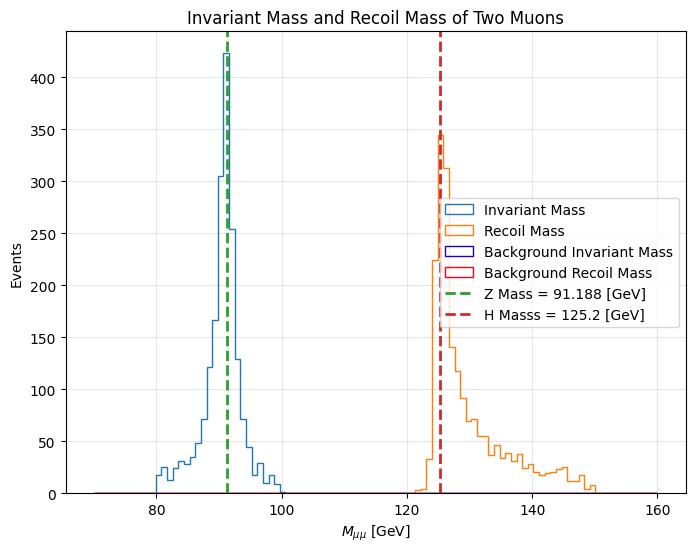

In [7]:
# Plot
plt.figure(figsize=(8,6))

# Invariant mass
plt.hist(filtered_invMass, bins=100, range=(70,160), histtype="step", color="#1f77b4", label="Invariant Mass")
# Recoil mass
plt.hist(filtered_recoilMass, bins=100, range=(70,160), histtype="step", color="#ff7f0e", label="Recoil Mass")

#Background
# Invariant mass
plt.hist(bg_filtered_invMass, bins=100, range=(70,160), histtype="step", color="#1f00b4", label="Background Invariant Mass")
# Recoil mass
plt.hist(bg_filtered_recoilMass, bins=100, range=(70,160), histtype="step", color="#ff000e", label="Background Recoil Mass")
# Vertical line for Z mass
plt.axvline(
    z_mass,
    color='#2ca02c',            # line colour
    linestyle='--',        # dashed line (solid, dashdot, etc.)
    linewidth=2,
    label=f'Z Mass = {z_mass} [GeV]'
)

# Vertical line for Z mass
plt.axvline(
    h_mass,
    color='#d62728',            # line colour
    linestyle='--',        # dashed line (solid, dashdot, etc.)
    linewidth=2,
    label=f'H Masss = {h_mass} [GeV]'
)

plt.xlabel(r"$M_{\mu\mu}$ [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass and Recoil Mass of Two Muons")
plt.grid(alpha=0.3)

plt.legend()
plt.plot()
plt.savefig("muon_histogram.png")


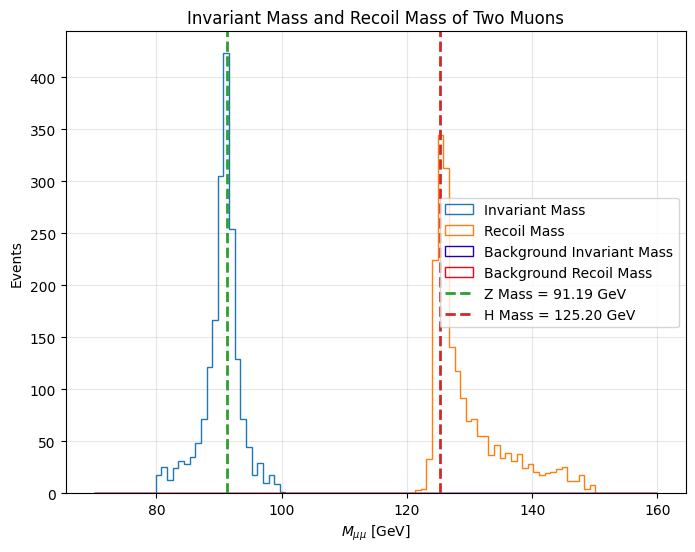

In [8]:
def plot_muon_histograms(
    inv_mass,
    recoil_mass,
    background_inv_mass,
    background_recoil_mass,
    z_mass,
    h_mass,
    *,
    bins=100,
    range_limits=(70, 160),
    figsize=(8, 6),
    inv_color="#1f77b4",
    recoil_color="#ff7f0e",
    z_line_color="#2ca02c",
    h_line_color="#d62728",
    line_style="--",
    line_width=2,
    xlabel=r"$M_{\mu\mu}$ [GeV]",
    ylabel="Events",
    title="Invariant Mass and Recoil Mass of Two Muons",
    grid_alpha=0.3,
    save_path=None,
    show=False,
    bool_return=False
):
    """
    Plot invariant‑mass and recoil‑mass histograms for a dimuon sample,
    with vertical reference lines for the Z and H boson masses.

    Parameters
    ----------
    inv_mass : array‑like
        Values for the invariant‑mass distribution.
    recoil_mass : array‑like
        Values for the recoil‑mass distribution.
    z_mass : float
        Reference Z‑boson mass (GeV).
    h_mass : float
        Reference Higgs‑boson mass (GeV).
    bins, range_limits, figsize, … : optional
        Styling knobs – see defaults above.
    title, xlabel, ylabel : str
        Text for the plot title and axis labels.
    save_path : str or None, default None
        If provided, ``fig.savefig(save_path)`` is called.
    show : bool, default False
        If True, ``plt.show()`` is invoked before returning.

    Returns
    -------
    fig : matplotlib.figure.Figure
        The created figure (useful for further tweaking or embedding).
    """

    # ------------------------------------------------------------------
    # Create the canvas
    # ------------------------------------------------------------------
    fig = plt.figure(figsize=figsize)

    # ------------------------------------------------------------------
    # Signal Histograms
    # ------------------------------------------------------------------
    plt.hist(
        inv_mass,
        bins=bins,
        range=range_limits,
        histtype="step",
        color=inv_color,
        label="Invariant Mass",
    )
    plt.hist(
        recoil_mass,
        bins=bins,
        range=range_limits,
        histtype="step",
        color=recoil_color,
        label="Recoil Mass",
    )

    # ------------------------------------------------------------------
    # Background Histograms
    # ------------------------------------------------------------------
    plt.hist(
        background_inv_mass,
        bins=bins,
        range=range_limits,
        histtype="step",
        color="#1f00b4",
        label="Background Invariant Mass",
    )
    plt.hist(
        background_recoil_mass,
        bins=bins,
        range=range_limits,
        histtype="step",
        color="#ff000e",
        label="Background Recoil Mass",
    )
    
    # ------------------------------------------------------------------
    # Reference vertical lines
    # ------------------------------------------------------------------
    plt.axvline(
        z_mass,
        color=z_line_color,
        linestyle=line_style,
        linewidth=line_width,
        label=f"Z Mass = {z_mass:.2f} GeV",
    )
    plt.axvline(
        h_mass,
        color=h_line_color,
        linestyle=line_style,
        linewidth=line_width,
        label=f"H Mass = {h_mass:.2f} GeV",
    )

    # ------------------------------------------------------------------
    # Labels, title, grid, legend
    # ------------------------------------------------------------------
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(alpha=grid_alpha)
    plt.legend()

    # ------------------------------------------------------------------
    # Output handling
    # ------------------------------------------------------------------
    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    if show:
        plt.show()

    # Return the figure so callers can further customise or embed it
    if bool_return:
        return fig
    if not bool_return:
        return

# Call the function
plot_muon_histograms(
    filtered_invMass,
    filtered_recoilMass,
    bg_filtered_invMass,
    bg_filtered_recoilMass,
    z_mass,
    h_mass,
    save_path="muon_histogram.png",   # writes the PNG file
    show=True                         # also pops up the window (optional)
)

In [9]:
sig_px = load_branch(sig_tree,"px")
sig_py = load_branch(sig_tree,"py")
sig_pz = load_branch(sig_tree,"pz")

bg_px = load_branch(bg_tree,"px")
bg_py = load_branch(bg_tree,"py")
bg_pz = load_branch(bg_tree,"pz")

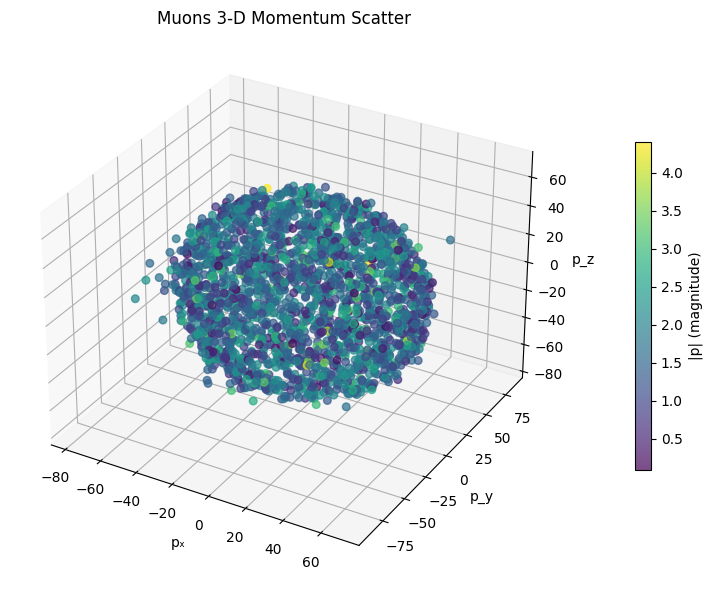

<Figure size 640x480 with 0 Axes>

In [10]:
# Example data – replace with your own array
momenta = np.random.randn(len(sig_px), 3)   # shape (N, 3)

#px, py, pz = momenta.T               # unpack columns

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(sig_px, sig_py, sig_pz,
                c=np.linalg.norm(momenta, axis=1),   # colour by magnitude
                cmap='viridis',
                s=30, alpha=0.7)

ax.set_xlabel('pₓ')
ax.set_ylabel('p_y')
ax.set_zlabel('p_z')
ax.set_title('Muons 3‑D Momentum Scatter')
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('|p| (magnitude)')
plt.tight_layout()
plt.show()
plt.savefig("muon_3d_momentum.png")

In [11]:
def plot_3d_scatter(
    signal_px,
    signal_py,
    signal_pz,
    background_px=None,
    background_py=None,
    background_pz=None,
    *,
    xlabel=r"$M_{\mu\mu}$ [GeV]",
    ylabel="Events",
    title="Invariant Mass and Recoil Mass of Two Muons",
    figsize=(8, 6),
    cmap='viridis',
    point_size=30,
    alpha=0.7,
    bg_alpha=0.3,
    save_path="muon_3d_momentum.png",
    show_plot=True,
):
    """
    Create a 3‑D scatter plot of particle momenta.

    Parameters
    ----------
    signal_px, signal_py, signal_pz : array‑like
        Components of the *signal* momentum vectors (e.g. muons).
    background_px, background_py, background_pz : array‑like, optional
        Components of a secondary/background dataset that will be plotted
        with a lighter style.  If any of these are ``None`` the background
        series is omitted.
    figsize : tuple, default (8, 6)
        Size of the Matplotlib figure.
    cmap : str, default 'viridis'
        Colormap used to colour the signal points by their magnitude.
    point_size : float, default 30
        Marker size for the signal points.
    alpha : float, default 0.7
        Opacity for the signal markers.
    bg_alpha : float, default 0.3
        Opacity for the background markers.
    save_path : str, default "muon_3d_momentum.png"
        Where to write the PNG image.
    show_plot : bool, default True
        If ``True`` the figure is displayed via ``plt.show()``.
    """

    # ------------------------------------------------------------------
    # Assemble the signal magnitude for colour mapping
    # ------------------------------------------------------------------
    signal_momenta = np.column_stack((signal_px, signal_py, signal_pz))
    signal_mag = np.linalg.norm(signal_momenta, axis=1)

    # ------------------------------------------------------------------
    # Figure / 3‑D axis setup
    # ------------------------------------------------------------------
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')

    # ------------------------------------------------------------------
    # Plot the main (signal) data
    # ------------------------------------------------------------------
    sc_signal = ax.scatter(
        signal_px,
        signal_py,
        signal_pz,
        c=signal_mag,
        cmap=cmap,
        s=point_size,
        alpha=alpha,
        label='Signal',
    )

    # ------------------------------------------------------------------
    # Optional background scatter
    # ------------------------------------------------------------------
    if (
        background_px is not None
        and background_py is not None
        and background_pz is not None
    ):
        ax.scatter(
            background_px,
            background_py,
            background_pz,
            c='gray',
            s=point_size,
            alpha=bg_alpha,
            label='Background',
        )

    # ------------------------------------------------------------------
    # Axis labels, title, colour bar
    # ------------------------------------------------------------------
    ax.set_xlabel(r'$p_x$')
    ax.set_ylabel(r'$p_y$')
    ax.set_zlabel(r'$p_z$')
    ax.set_title('Muons 3‑D Momentum Scatter')
    ax.legend()
    cbar = fig.colorbar(sc_signal, ax=ax, shrink=0.6, pad=0.1)
    cbar.set_label(r'$|\vec{p}|$ (magnitude)')

    # ------------------------------------------------------------------
    # Layout, save, optionally show
    # ------------------------------------------------------------------
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    if show_plot:
        plt.show()
    plt.close(fig)   # free memory when called repeatedly

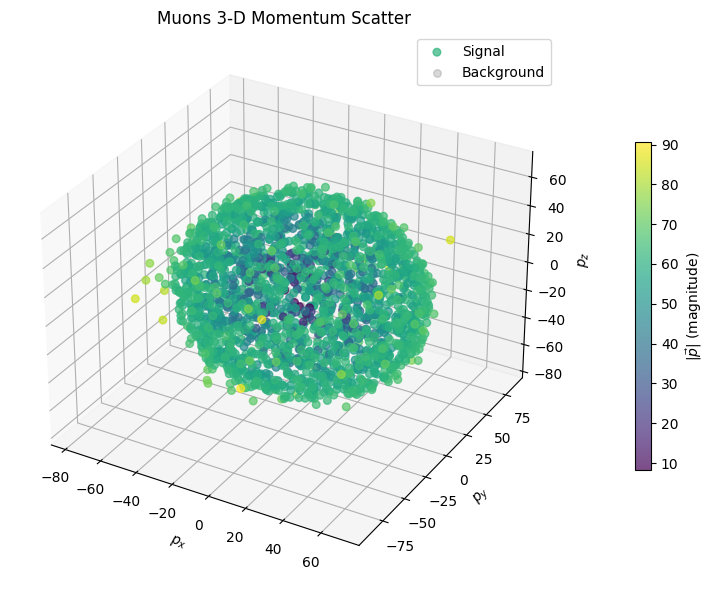

In [12]:
# Call the plotting routine
plot_3d_scatter(
    sig_px,
    sig_py,
    sig_pz,
    background_px=bg_px,
    background_py=bg_py,
    background_pz=bg_pz,
    save_path="my_muon_scatter.png",
    show_plot=True,
)

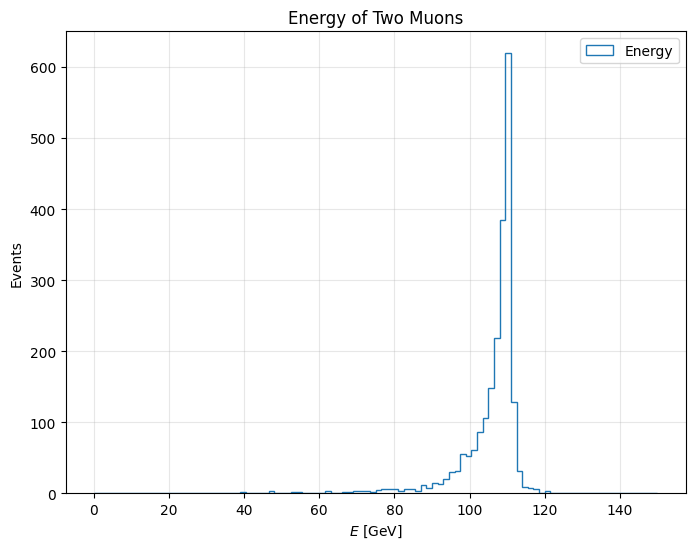

In [13]:
sig_energy = load_branch(sig_tree,"totalEnergy")
bg_energy = load_branch(bg_tree,"totalEnergy")

# Plot
plt.figure(figsize=(8,6))

#Invariant mass
plt.hist(sig_energy, bins=100, range=(0,150), histtype="step", color="#1f77b4", label="Energy")

plt.xlabel(r"$E$ [GeV]")
plt.ylabel("Events")
plt.title("Energy of Two Muons")
plt.grid(alpha=0.3)

plt.legend()
plt.plot()
plt.savefig("muon_energy.png")

## 1-D Histogram Function

In [14]:
def plot_histogram(
    signal_data,
    background_data=None,
    *,
    bins=100,
    range_min=0,
    range_max=150,
    signal_color="#1f77b4",
    background_color="#ff7f0e",
    signal_label="Signal",
    background_label="Background",
    title="Energy of Two Muons",
    xlabel=r"$E$ \[GeV\]",
    ylabel="Events",
    figsize=(8, 6),
    grid_alpha=0.3,
    save_path="muon_energy.png",
    show_plot=True,
):
    """
    Plot a 1‑D histogram for signal and background (optional) data.

    Parameters
    ----------
    signal_energy : array‑like
        Energy values for the primary (signal) sample.
    background_energy : array‑like, optional
        Energy values for a secondary/background sample.  If provided a second
        histogram is drawn on top of the signal histogram.
    bins : int, default 100
        Number of histogram bins.
    range_min, range_max : float, default 0, 150
        Lower and upper bounds of the histogram range (in GeV).
    signal_color, background_color : str, default Matplotlib defaults
        Colours for the two histograms.
    signal_label, background_label : str
        Labels shown in the legend.
    title, xlabel, ylabel : str
        Text for the plot title and axis labels.
    figsize : tuple, default (8, 6)
        Size of the Matplotlib figure.
    grid_alpha : float, default 0.3
        Transparency of the grid lines.
    save_path : str, default "muon_energy.png"
        Destination filename for the saved PNG.
    show_plot : bool, default True
        If True, displays the figure via ``plt.show()``.
    """
    # ------------------------------------------------------------------
    # Convert inputs to NumPy arrays (ensures compatibility with .hist)
    # ------------------------------------------------------------------
    signal_arr = np.asarray(signal_data)
    if background_data is not None:
        background_arr = np.asarray(background_data)

    # ------------------------------------------------------------------
    # Set up the figure / axes
    # ------------------------------------------------------------------
    plt.figure(figsize=figsize)

    # ------------------------------------------------------------------
    # Primary (signal) histogram
    # ------------------------------------------------------------------
    plt.hist(
        signal_arr,
        bins=bins,
        range=(range_min, range_max),
        histtype="step",
        color=signal_color,
        label=signal_label,
        linewidth=1.5,
    )

    # ------------------------------------------------------------------
    # Optional background histogram (drawn with a semi‑transparent fill)
    # ------------------------------------------------------------------
    if background_data is not None:
        plt.hist(
            background_arr,
            bins=bins,
            range=(range_min, range_max),
            histtype="stepfilled",
            color=background_color,
            alpha=0.4,
            label=background_label,
            linewidth=0,
        )

    # ------------------------------------------------------------------
    # Axis labels, title, grid, legend
    # ------------------------------------------------------------------
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(alpha=grid_alpha)
    plt.legend()

    # ------------------------------------------------------------------
    # Save (and optionally show) the figure
    # ------------------------------------------------------------------
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    if show_plot:
        plt.show()
    plt.close()  # free resources if called many times

## Muon Pair Energy Distribution Histogram

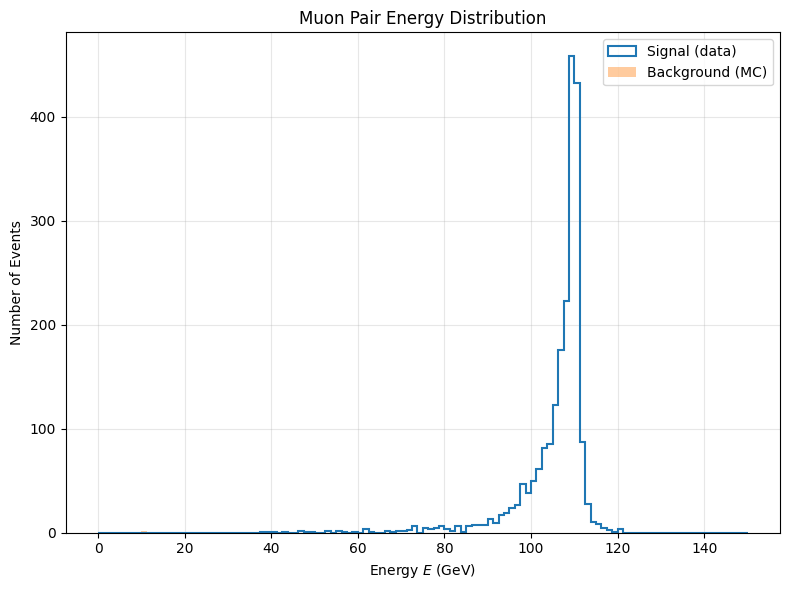

In [15]:
# --------------------------------------------------------------
# Produce the plot
# --------------------------------------------------------------
plot_histogram(
    signal_data=sig_energy,
    background_data=bg_energy,
    bins=120,
    range_min=0,
    range_max=150,
    signal_label="Signal (data)",
    background_label="Background (MC)",
    title="Muon Pair Energy Distribution",
    xlabel=r"Energy $E$ (GeV)",
    ylabel="Number of Events",
    save_path="muon_energy_comparison.png",
    show_plot=True,
)

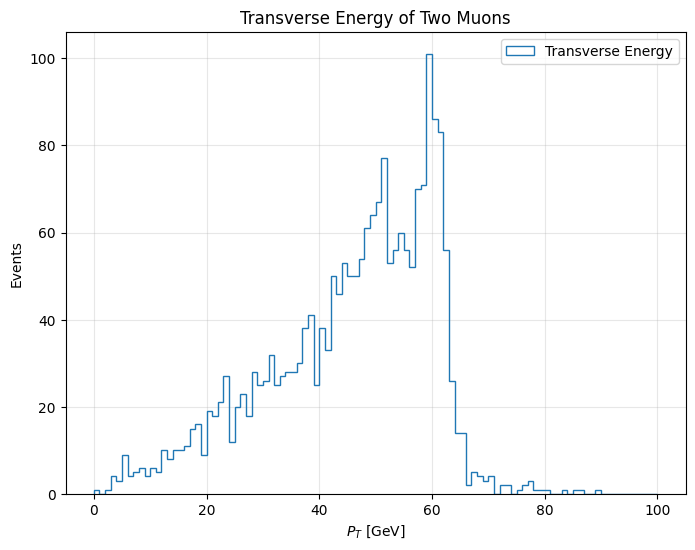

In [16]:
sig_met = load_branch(sig_tree,"met")
bg_met = load_branch(bg_tree,"met")

# Plot
plt.figure(figsize=(8,6))

#Invariant mass
plt.hist(sig_met, bins=100, range=(0,100), histtype="step", color="#1f77b4", label="Transverse Energy")

plt.xlabel(r"$P_{T}$ [GeV]")
plt.ylabel("Events")
plt.title("Transverse Energy of Two Muons")
plt.grid(alpha=0.3)

plt.legend()
plt.plot()
plt.savefig("muon_transverse_energy.png")

## Transverse Energy of Two Muons Histogram

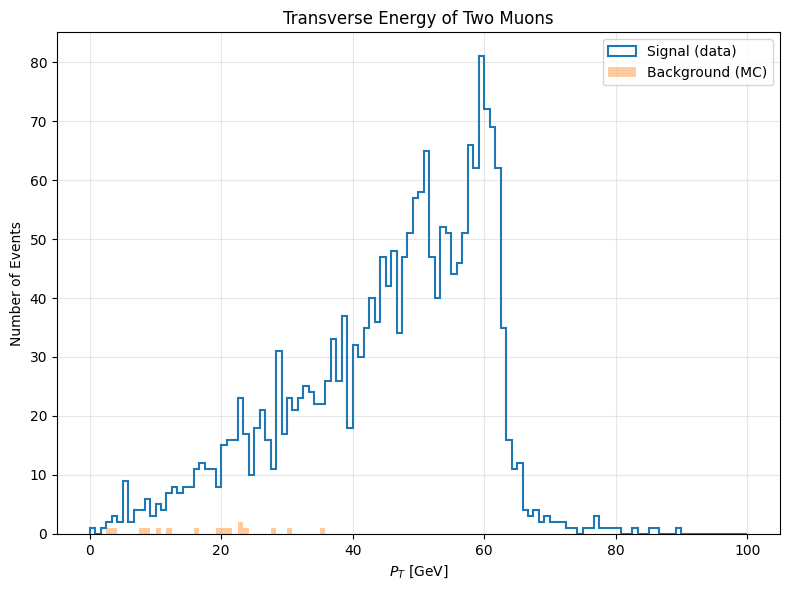

In [17]:
# --------------------------------------------------------------
# Produce the plot
# --------------------------------------------------------------
plot_histogram(
    signal_data=sig_met,
    background_data=bg_met,
    bins=120,
    range_min=0,
    range_max=100,
    signal_label="Signal (data)",
    background_label="Background (MC)",
    title="Transverse Energy of Two Muons",
    xlabel=r"$P_{T}$ [GeV]",
    ylabel="Number of Events",
    save_path="muon_energy_comparison.png",
    show_plot=True,
)

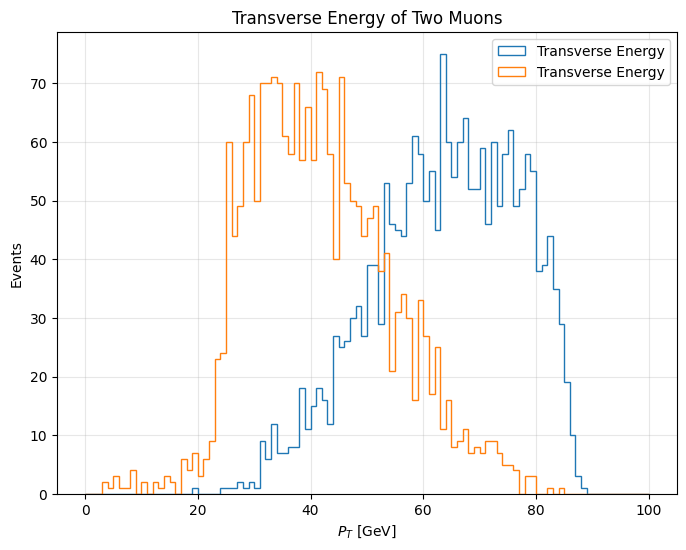

In [18]:
sig_muonEnergy_high = load_branch(sig_tree,"muonEnergy_high")
sig_muonEnergy_low = load_branch(sig_tree,"muonEnergy_low")

bg_muonEnergy_high = load_branch(bg_tree,"muonEnergy_high")
bg_muonEnergy_low = load_branch(bg_tree,"muonEnergy_low")

# Plot
plt.figure(figsize=(8,6))

#Invariant mass
plt.hist(sig_muonEnergy_high, bins=100, range=(0,100), histtype="step", color="#1f77b4", label="Transverse Energy")
plt.hist(sig_muonEnergy_low, bins=100, range=(0,100), histtype="step", color="#ff7f0e", label="Transverse Energy")


plt.xlabel(r"$P_{T}$ [GeV]")
plt.ylabel("Events")
plt.title("Transverse Energy of Two Muons")
plt.grid(alpha=0.3)

plt.legend()
plt.plot()
plt.savefig("muon_transverse_energy.png")

### Missing Energy Histogram

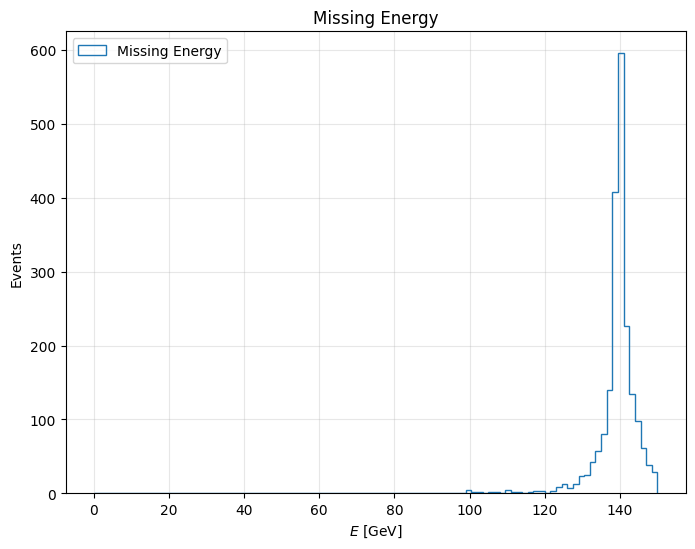

In [19]:
sig_missingEnergy = load_branch(sig_tree,"missingEnergy")
bg_missingEnergy = load_branch(bg_tree,"missingEnergy")

# Plot
plt.figure(figsize=(8,6))

#Invariant mass
plt.hist(sig_missingEnergy, bins=100, range=(0,150), histtype="step", color="#1f77b4", label="Missing Energy")

plt.xlabel(r"$E$ [GeV]")
plt.ylabel("Events")
plt.title("Missing Energy")
plt.grid(alpha=0.3)

plt.legend()
plt.plot()
plt.savefig("muon_energy.png")

### Muons 3‑D Missing Momentum Scatter

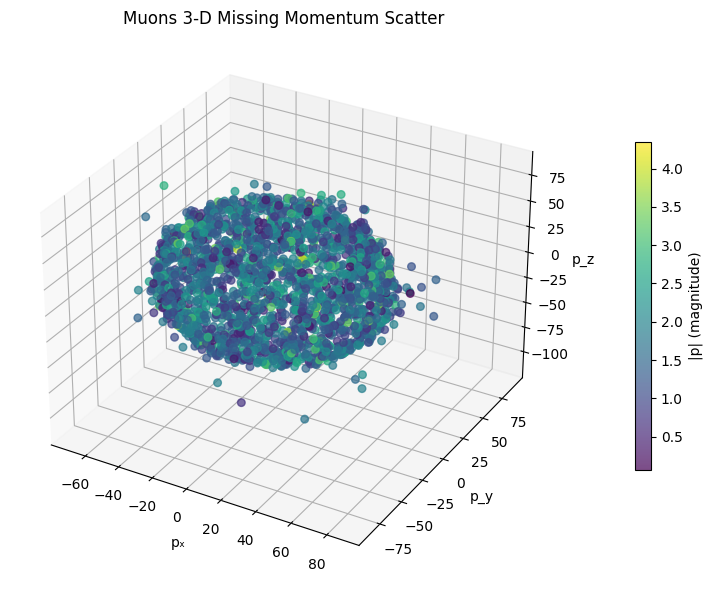

<Figure size 640x480 with 0 Axes>

In [20]:
sig_missingPx = load_branch(sig_tree,"missingPx")
sig_missingPy = load_branch(sig_tree,"missingPy")
sig_missingPz = load_branch(sig_tree,"missingPz")

bg_missingPx = load_branch(bg_tree,"missingPx")
bg_missingPy = load_branch(bg_tree,"missingPy")
bg_missingPz = load_branch(bg_tree,"missingPz")

# Example data – replace with your own array
momenta = np.random.randn(len(sig_missingPx), 3)   # shape (N, 3)

#px, py, pz = momenta.T               # unpack columns

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(sig_missingPx, sig_missingPy, sig_missingPz,
                c=np.linalg.norm(momenta, axis=1),   # colour by magnitude
                cmap='viridis',
                s=30, alpha=0.7)

ax.set_xlabel('pₓ')
ax.set_ylabel('p_y')
ax.set_zlabel('p_z')
ax.set_title('Muons 3‑D Missing Momentum Scatter')
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('|p| (magnitude)')
plt.tight_layout()
plt.show()
plt.savefig("muon_3d_momentum.png")

In [ ]:
# Call the plotting routine
plot_3d_scatter(
    sig_missingPx,
    sig_missingPy,
    sig_missingPz,
    background_px=bg_missingPx,
    background_py=bg_missingPy,
    background_pz=bg_missingPx,
    save_path="my_muon_scatter.png",
    show_plot=True,
)